Подключение библиотек и скриптов

In [3]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
matplotlib.rcParams.update({'font.size': 14})

Добавляем функцию для расчета метрик и построения графиков по ним

In [6]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))

    plt.figure(figsize=(18,10))
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

Пути к директориям и файлам

In [7]:
TRAIN_DATASET_PATH = 'C:/Users/Анастасия Рахманина/Desktop/project_data_from_kaggle/train.csv' # y_train, y_valid
TEST_DATASET_PATH = 'C:/Users/Анастасия Рахманина/Desktop/project_data_from_kaggle/test.csv'

## Загрузка данных

# Описание датасета

Описание датасета


* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

Посмотрим на данные 

In [8]:
train = pd.read_csv(TRAIN_DATASET_PATH)
train.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
5,5804,99,3.0,62.528465,47.103833,6.0,9,9.0,1972,0.012339,B,B,35,5776,1,2078.0,2,4,B,161044.944138
6,8864,44,1.0,33.938750,21.772930,9.0,1,12.0,1968,0.232205,B,B,24,4860,1,80.0,0,3,B,142402.739272
7,13072,59,2.0,50.391814,32.893256,8.0,8,17.0,1986,0.019509,B,B,37,7687,11,176.0,5,5,B,326174.175191
8,9951,1,1.0,46.887892,44.628132,1.0,12,20.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,160400.401732
9,8094,6,3.0,79.867477,75.085125,1.0,3,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,194756.023945


In [9]:
train = pd.read_csv(TRAIN_DATASET_PATH)
train.tail(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9990,10635,21,1.0,18.983962,11.419796,2.0,1,5.0,1967,0.194489,B,B,47,8004,3,125.0,3,5,B,112411.221700
9991,11173,6,2.0,62.648779,NaN,0.0,6,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,182625.548872
9992,11753,37,2.0,50.902724,27.159548,6.0,4,9.0,1972,0.127812,B,B,28,7287,5,320.0,1,3,B,196641.468817
9993,9289,1,3.0,84.486078,88.931509,0.0,4,22.0,2016,0.007122,B,B,1,264,0,NaN,0,1,B,264213.558631
9994,4356,9,1.0,43.303458,21.519087,8.0,12,14.0,1992,0.161532,B,B,25,5648,1,30.0,2,4,B,136744.340827
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855
9999,7202,94,1.0,35.815476,22.301367,6.0,9,9.0,1975,0.127376,B,B,43,8429,3,NaN,3,9,B,177685.627486


In [10]:
test = pd.read_csv(TEST_DATASET_PATH)
test.tail(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4990,10158,46,2.0,46.288491,27.270795,6.0,7,9.0,1974,0.150818,B,B,16,3433,4,2643.0,4,5,B
4991,8252,47,2.0,48.107250,29.208798,6.0,5,9.0,1976,0.000070,B,B,46,10309,1,240.0,1,16,B
4992,8834,81,1.0,36.848987,23.489930,10.0,5,12.0,1970,0.006076,B,B,30,5285,0,645.0,6,6,B
4993,14676,6,1.0,48.435108,NaN,1.0,18,25.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B
4994,13060,25,2.0,51.144906,48.979540,1.0,18,25.0,2015,0.069753,B,B,53,13670,4,NaN,1,11,B
4995,10379,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B
4996,16138,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,3912,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B
4999,11004,21,2.0,67.122742,33.944344,13.0,9,17.0,2009,0.194489,B,B,47,8004,3,125.0,3,5,B


In [11]:
print('Строк в трейне:', train.shape[0])
print('Строк в тесте', test.shape[0])

Строк в трейне: 10000
Строк в тесте 5000


In [12]:
train.shape[1] - 1 == test.shape[1]

True

## Приведение типов

In [13]:
train.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [14]:
train['Id'] = train['Id'].astype(str)
train['DistrictId'] = train['DistrictId'].astype(str)

# 1.EDA

## Построим матрицу корреляций 

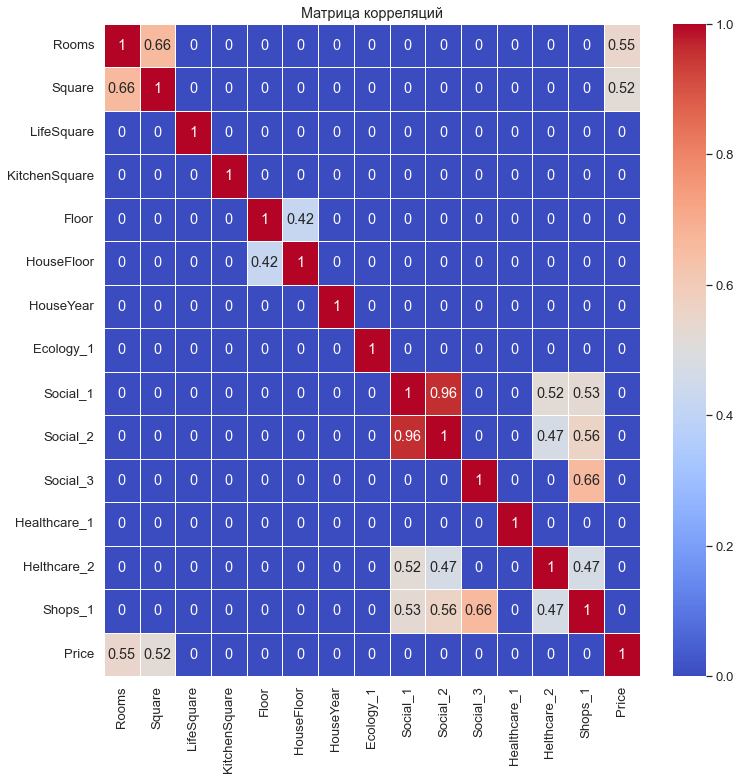

In [15]:
plt.figure(figsize = (12,12))

sns.set(font_scale=1.2)

corr_matrix = train.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Матрица корреляций')
plt.show()

Проанализируем корреляции:
1) количество комнат ожидаемо умеренно коррелирует с площадью квартиры и ценой;
2) площадь тоже;
3) чем выше этаж, тем больше этажей (корреляция средняя, логичная);
4) два социальных признака сильно коррелируют, надо либо удалить один, дибо как-то объединить их;
5) 

## Целевая переменная

Рассмотрим целевую переменную и ее распределение

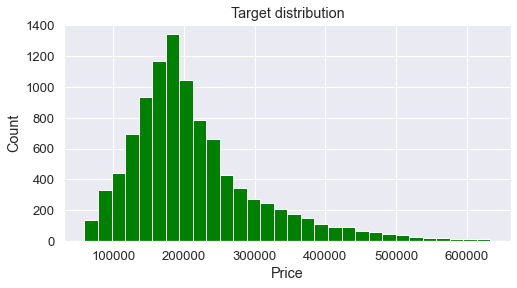

In [16]:
plt.figure(figsize = (8, 4))

train['Price'].hist(bins=30, color = 'green')
plt.ylabel('Count')
plt.xlabel('Price')


plt.title('Target distribution')
plt.show()

Теперь рассмотрим количественные и вещественные признаки, чтобы очистить от выбросов и заполнить пустые поля

## Количественные переменные

In [17]:
train.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


## Категориальные переменные

In [18]:
cat_colnames = train.select_dtypes(include='object').columns.tolist()
cat_colnames

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

for cat_colname in cat_colnames[2:]:
    print(str(cat_colname) + '\n\n' + str(train[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

## Обработка выбросов

Rooms

In [19]:
train['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

Видим,что имеются выбросы в виде 0 комнат (что невозможно), а количество квартир, где больше 5 комнат - минимально

Square, LifeSquare, KitchenSquare

После просмотра valuecounts (после проверки вырезала из кода) вышеописанных переменных, заметно, что проще очистить выборку через квантили

Также немного "поиграемся" с квантилями, чтобы понять, где есть резкий скачок и какие данные лучше отбросить)

In [20]:
train['KitchenSquare'].quantile(.99), train['KitchenSquare'].quantile(.32)

(16.0, 4.0)

In [21]:
train['Square'].quantile(.99), train['Square'].quantile(.10)

(117.85611482113002, 36.99278102505979)

In [22]:
train['LifeSquare'].quantile(.95), train['Square'].quantile(.002)

(68.27700073931355, 19.925535701033183)

HouseFloor, Floor

 Минимальная этажность дома должна быть 1, максимальная - 42 (максимум по Floor)

In [23]:
train['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.])

Предполагаю, что 0, 99 и 117 этажей - выбросы,заменяем их на медиану (нули могут быть пропущенными значениями, а не минимальными) и 48

In [24]:
train.loc[train['HouseFloor'] == 0, 'HouseFloor'] = train ['HouseFloor'].median()
train.loc[train['HouseFloor'] > 42, 'HouseFloor'] = 42

In [25]:
train['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42],
      dtype=int64)

Этаж здания выглядит приемлемо

Если этаж выше этажности дома, меняю данные местами

## Обработаем пропуски

In [26]:
train.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

Выражаем жилую площадь через общую площадь, площадь кухни за минусом 1,5 на санузел.

Заполняем пропуски по здравоохранению медианой 

Исходя из корреляции удаляем признак Social_2

In [27]:
train = train.drop('Social_2', axis = 1)

In [28]:
class DataPreprocessing:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        self.medians = None
        
        
    def fit(self, X):
        """Сохранение статистик"""       
        # Расчет медиан
        self.medians = X.median()
    
    def transform(self, X):
        """Трансформация данных"""

        # Rooms
        X['Rooms_outlier'] = 0
        X.loc[(X['Rooms'] == 0) | (X['Rooms'] > 5), 'Rooms_outlier'] = 1
        
        X.loc[X['Rooms'] == 0, 'Rooms'] = 1
        X.loc[X['Rooms'] > 5, 'Rooms'] = 5
        
        # Lifesquare
        
        X.loc[X['LifeSquare'] < 20, 'LifeSquare'] = 20
        X.loc[X['LifeSquare'] > 50, 'LifeSquare'] = 50
        
        # Square
        X.loc[train ['Square'] < 40, 'Square'] = 40
        X.loc[train ['Square'] > 120, 'Square'] = 120
        
        
        # KitchenSquare
        
        X.loc[X ['KitchenSquare'] >16, 'KitchenSquare'] = 16
        X.loc[X['KitchenSquare'] < 1, 'KitchenSquare'] = 1
        
        # HouseFloor, Floor
        X['HouseFloor_outlier'] = 0
        X.loc[X['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
        X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor_outlier'] = 1
        X.loc[X['HouseFloor'] == 0, 'HouseFloor'] = self.medians['HouseFloor']
        X.loc[X['HouseFloor'] > 42, 'HouseFloor'] = 42
        
        floor_outliers = X.loc[X['Floor'] > X['HouseFloor']].index
        X.loc[floor_outliers, 'Floor'] = X.loc[floor_outliers, 'HouseFloor']\
                                            .apply(lambda x: random.randint(1, x))
        
        # HouseYear
        
        X['HouseYear_outlier'] = 0
        X.loc[X['HouseYear'] > 2020, 'HouseYear_outlier'] = 1
    
        # Healthcare_1
        X.loc[X['Healthcare_1'].isnull(), 'Healthcare_1'] = self.medians['Healthcare_1']
        
        
        
        
            
        # LifeSquare
        X['LifeSquare_nan'] = X['LifeSquare'].isna() * 1
        living = (X['LifeSquare'].isna()) & \
                      (~X['Square'].isna()) & \
                      (~X['KitchenSquare'].isna())
        
        X.loc[living, 'LifeSquare'] = X.loc[living, 'Square'] - X.loc[living, 'KitchenSquare'] - 1.5
        
        
        X.fillna(self.medians, inplace=True)
        
        return X

## Построение новых признаков

Dummies

In [29]:
train['Ecology_2_bin'] = train['Ecology_2'].replace({'A':0, 'B':1})
train['Ecology_3_bin'] = train['Ecology_3'].replace({'A':0, 'B':1})
train['Shops_2_bin'] = train['Shops_2'].replace({'A':0, 'B':1})

DistrictSize, IsDistrictLarge

In [30]:
(train['DistrictSize'] > 100).value_counts()

KeyError: 'DistrictSize'

MedPriceByDistrict

In [31]:
class FeatureGenetator():
    """Генерация новых фич"""
    
    def __init__(self):
        self.DistrictId_counts = None
        self.binary_to_numbers = None
        self.med_price_by_district = None
        self.district_size = None
    def fit(self, X, y=None):
        
        X = X.copy()
        
        # Binary features
        self.binary_to_numbers = {'A': 0, 'B': 1}
        
        # DistrictID
        self.district_size = X['DistrictId'].value_counts().reset_index() \
                               .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
        df = X.copy()
        
        if y is not None:
            df['Price'] = y.values
            
            self.med_price_by_district = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                                            .rename(columns={'Price':'MedPriceByDistrict'})
            
            self.med_price_by_district_median = self.med_price_by_district['MedPriceByDistrict'].median()
    def transform(self, X):
        
        # Binary features
        X['Ecology_2'] = X['Ecology_2'].map(self.binary_to_numbers)  # self.binary_to_numbers = {'A': 0, 'B': 1}
        X['Ecology_3'] = X['Ecology_3'].map(self.binary_to_numbers)
        X['Shops_2'] = X['Shops_2'].map(self.binary_to_numbers)
        # DistrictId, IsDistrictLarge
        X = X.merge(self.district_size, on='DistrictId', how='left')
        
        X['new_district'] = 0
        X.loc[X['DistrictSize'].isna(), 'new_district'] = 1
        
        X['DistrictSize'].fillna(5, inplace=True)
        
        X['IsDistrictLarge'] = (X['DistrictSize'] > 100).astype(int)
         # Target encoding
        if self.med_price_by_district is not None:
            X = X.merge(self.med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
            X['MedPriceByDistrict'].fillna(self.med_price_by_district_median, inplace=True)
            return X

## Отбор признаков

In [32]:
train.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Ecology_2_bin',
 'Ecology_3_bin',
 'Shops_2_bin']

In [33]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_3',
                 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2']

new_feature_names = ['Rooms_outlier','HouseFloor_outlier','LifeSquare_nan','DistrictSize','IsDistrictLarge','MedPriceByDistrict',]

target_name = 'Price'

## Разбиение на train и test

In [34]:
train = pd.read_csv(TRAIN_DATASET_PATH)
test= pd.read_csv(TEST_DATASET_PATH)

X = train.drop(columns=target_name)
y = train[target_name]

In [35]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [36]:
preprocessor = DataPreprocessing()
preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)
test = preprocessor.transform(test)

X_train.shape, X_valid.shape, test.shape

((8000, 23), (2000, 23), (5000, 23))

In [37]:
features_gen = FeatureGenetator()
features_gen.fit(X_train, y_train)

X_train = features_gen.transform(X_train)
X_valid = features_gen.transform(X_valid)
test = features_gen.transform(test)

X_train.shape, X_valid.shape, test.shape

((8000, 27), (2000, 27), (5000, 27))

In [38]:
X_train = X_train[feature_names + new_feature_names]
X_valid = X_valid[feature_names + new_feature_names]
test = test[feature_names + new_feature_names]

# Построение модели

Обучение

In [39]:
# rf_model = RandomForestRegressor(max_depth=8, min_samples_split=100, n_estimators=500, n_jobs=-1, random_state=39)
# rf_model.fit(X_train, y_train)

In [40]:
#y_train_preds = rf_model.predict(X_train)
#y_test_preds = rf_model.predict(X_valid)

#evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)


Кросс-валидация

In [41]:
#cv_score = cross_val_score(rf_model, X_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
#cv_score

In [42]:
#cv_score.mean()

In [44]:
#feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                  # columns=['feature_name', 'importance'])

#feature_importances.sort_values(by='importance', ascending=False)

## Рабочая модель

In [45]:
gb_model = GradientBoostingRegressor(min_samples_leaf=50, 
                                     random_state=42, 
                                     max_depth=6, 
                                     max_features='sqrt', 
                                     n_estimators=1250, 
                                     learning_rate=0.025)
gb_model.fit(X_train, y_train)
train_pred = gb_model.predict(X_train)
valid_pred = gb_model.predict(X_valid)
print(f'R2 on training dataset: {r2(y_train, train_pred)}')
print(f'R2 on testing dataset: {r2(y_valid, valid_pred)}')

R2 on training dataset: 0.8742467497273833
R2 on testing dataset: 0.7304768238570039


In [46]:
feature_importances = pd.DataFrame(zip(X_train.columns, gb_model.feature_importances_),
                                   columns=['feature_name', 'importance'])
feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
21,MedPriceByDistrict,2.925104e-01
1,Square,1.911039e-01
0,Rooms,1.094945e-01
19,DistrictSize,6.035244e-02
10,Social_1,5.878167e-02
2,LifeSquare,4.806234e-02
3,KitchenSquare,3.997458e-02
20,IsDistrictLarge,3.985531e-02
11,Social_3,3.634269e-02
6,HouseYear,3.048733e-02


In [47]:
predictions = gb_model.predict(test)

In [48]:
submission_path = 'C:/Users/Анастасия Рахманина/Desktop/project_data_from_kaggle/sample_submission.csv'

In [49]:
submission = pd.read_csv(submission_path, sep=',')
submission.head()

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0


In [50]:
submission['Price'] = predictions

In [51]:
submission.head()

,Id,Price
0,4567,157011.692494
1,5925,117508.831374
2,960,138403.548371
3,3848,105775.557051
4,746,175467.992244


In [53]:
submission.to_csv('C:/Users/Анастасия Рахманина/Desktop/project_data_from_kaggle/sample_submission.csv', index=False)

In [54]:
test.shape[0]

5000